<a href="https://colab.research.google.com/github/fmwashimba/COMPUTER-VISION-PROJECT/blob/main/Computer_vision_CNN_for_Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Unleashing the Power of Convolutional Neural Networks for Breast Cancer Diagnosis**

Breast cancer is a widely prevalent form of cancer among women, with Invasive Ductal Carcinoma (IDC) being the most common subtype. 

Pathologists typically focus on the areas of the whole mount sample that contain the IDC to determine the aggressiveness of cancer.

 To enable automatic aggressiveness grading, one of the common pre-processing steps is to identify and delineate the exact regions of IDC within the whole mount slide.

  Accurately categorizing the subtypes of breast cancer is a critical clinical task, and automated methods can help save time and reduce the risk of errors. 
  
  Our project involved using a Convolutional Neural Network (CNN) implemented in Python to detect and classify IDC in breast cancer samples. 

In [ ]:
#loading of libraries
# Data Manipulation and Visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Import a standardization library
from sklearn.preprocessing import StandardScaler

# Import an Multi-Layer Perceptron Classifier model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# to interact with the operating system
import os
import hashlib
import cv2

In [ ]:
# Preprocessing data
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
import pathlib


In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mount Drive
# mount drive for reusability
from google.colab import drive
drive.mount("drive")


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
#looping through the subdirectories to get number of images in each subdirectory

import os
import imghdr

parent_dir = "/content/drive/MyDrive/miniprject"
subdir1 = "0"
subdir2 = "1"

for subdir in [subdir1, subdir2]:
    subdir_path = os.path.join(parent_dir, subdir)
    num_png_files = 0
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        if imghdr.what(file_path) == "png":
            with open(file_path, "rb") as f:
                file_contents = f.read()
                # counting the images
            num_png_files += 1
    print("Number of PNG files in {}: {}".format(subdir, num_png_files))


Number of PNG files in 0: 15959
Number of PNG files in 1: 5466


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


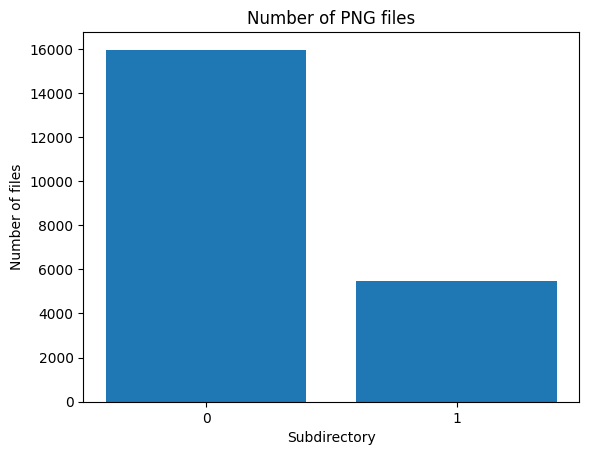

In [ ]:
#Visualisation of the imges in a bar graph
import os
import imghdr
import matplotlib.pyplot as plt

parent_dir = "/content/drive/MyDrive/miniprject"
subdir1 = "0"
subdir2 = "1"

num_png_files1 = 0
for filename in os.listdir(os.path.join(parent_dir, subdir1)):
    file_path = os.path.join(parent_dir, subdir1, filename)
    if imghdr.what(file_path) == "png":
        with open(file_path, "rb") as f:
            file_contents = f.read()
            # couting the images in subdirectory 1
        num_png_files1 += 1

num_png_files2 = 0
for filename in os.listdir(os.path.join(parent_dir, subdir2)):
    file_path = os.path.join(parent_dir, subdir2, filename)
    if imghdr.what(file_path) == "png":
        with open(file_path, "rb") as f:
            file_contents = f.read()
            #counting images in the subdirectory 0
        num_png_files2 += 1

# Generate bar graph
labels = [subdir1, subdir2]
values = [num_png_files1, num_png_files2]
plt.bar(labels, values)
plt.title("Number of PNG files")
plt.xlabel("Subdirectory")
plt.ylabel("Number of files")
plt.show()


In [ ]:

#checking for missing images, duplicate images or blank images
import os
import imghdr

parent_dir = "/content/drive/MyDrive/miniprject"
subdir1 = "0"
subdir2 = "1"

# Check for missing images and blank PNG files
missing_files = 0
blank_files = 0

for subdir in [subdir1, subdir2]:
    subdir_path = os.path.join(parent_dir, subdir)
    num_png_files = 0
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        if imghdr.what(file_path) == "png":
            with open(file_path, "rb") as f:
                # Check for blank PNG files
                if len(file_contents) == 0:
                    print("Blank PNG file found:", file_path)
                    blank_files += 1
            num_png_files += 1
        else:
            # Check for missing images
            print("File is not a PNG image:", file_path)
            missing_files += 1
    print("Number of PNG files in {}: {}".format(subdir, num_png_files))

# Check for duplicates
duplicates_found = 0
filenames_seen = set()
for subdir in [subdir1, subdir2]:
    subdir_path = os.path.join(parent_dir, subdir)
    for filename in os.listdir(subdir_path):
        if filename in filenames_seen:
            print("Duplicate file found:", os.path.join(subdir_path, filename))
            duplicates_found += 1
        else:
            filenames_seen.add(filename)

if missing_files == 0:
    print("No missing files found.")
else:
    print("Number of missing files found:", missing_files)

if blank_files == 0:
    print("No blank files found.")
else:
    print("Number of blank files found:", blank_files)

if duplicates_found == 0:
    print("No duplicates found.")
else:
    print("Number of duplicates found:", duplicates_found)

Number of PNG files in 0: 15959
Number of PNG files in 1: 5466
No missing files found.
No blank files found.
No duplicates found.


In [ ]:
#Normalization
import os
import imghdr
import numpy as np

parent_dir = "/content/drive/MyDrive/miniprject"
subdir1 = "0"
subdir2 = "1"

sizes = []
max_pixels = []
min_pixels = []

# Check for missing images and blank PNG files
for subdir in [subdir1, subdir2]:
    subdir_path = os.path.join(parent_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        if imghdr.what(file_path) == "png":
            with open(file_path, "rb") as f:
                file_contents = f.read()
                # Check for blank PNG files
                if len(file_contents) == 0:
                    print("Blank PNG file found:", file_path)
                else:
                    # Get image size and pixel values
                    img_array = np.array(list(file_contents))
                    img_size = len(file_contents)
                    img_max = np.max(img_array)
                    img_min = np.min(img_array)
                    sizes.append(img_size)
                    max_pixels.append(img_max)
                    min_pixels.append(img_min)
        else:
            # Check for missing images
            print("File is not a PNG image:", file_path)

# Calculate average image size and pixel values
avg_size = np.mean(sizes)
avg_max_pixel = np.mean(max_pixels)
avg_min_pixel = np.mean(min_pixels)

print("Average image size:", avg_size)
print("Average max pixel value:", avg_max_pixel)
print("Average min pixel value:", avg_min_pixel)


Average image size: 5896.382217036173
Average max pixel value: 254.9996732788798
Average min pixel value: 0.0


In [ ]:
#DATA AUGMENTATION + NORMALIZATION 
#resizing, cropping, normalizing (pixel are at same range)
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Define the root directory of the dataset
root_dir = "/content/drive/MyDrive/miniprject"

# Define the transformations to apply to each image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the ImageFolder dataset object
dataset = datasets.ImageFolder(root=root_dir, transform=transform)


In [ ]:
# mean and standard deviaetion

import torchvision.transforms as transforms

# Define the mean and standard deviation of the dataset
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define the image transformation sequence
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])


In [ ]:
import torchvision.datasets as datasets

# Define the path to the dataset
dataset_path = "/content/drive/MyDrive/miniprject"

# Define the mean and standard deviation of the dataset
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define the image transformation sequence
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Create the dataset object
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)


In [ ]:
#changeing the list to numpy array.
import os
from PIL import Image
import numpy as np

parent_dir = '/content/drive/MyDrive/miniprject'
subdirs = ['0', '1']

images = []  # A list to hold the numpy arrays of the images
for subdir in subdirs:
    subdir_path = os.path.join(parent_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        if filename.endswith('.png'):  # Check that the file is a PNG file
            # Load the image file into a PIL Image object
            img = Image.open(file_path)

            # Convert the PIL Image object to a numpy array
            img_array = np.array(img)

            # Append the numpy array to the list of images
            images.append(img_array)

# Print the shape of the first image in the list
print(images[0].shape)


(50, 50, 3)


In [ ]:
#Importing imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

# Define data generator with normalization
data_generator = ImageDataGenerator(
    rescale=1./255
)


In [ ]:
#importing libraries
import pandas as pd
import os
from PIL import Image
from sklearn.model_selection import train_test_split

data_dir = '/content/drive/MyDrive/miniprject'

# Create lists of image paths and their corresponding labels
image_paths = []
labels = []
for subdir in ['0', '1']:
    subdir_path = os.path.join(data_dir, subdir)
    for filename in os.listdir(subdir_path):
        image_path = os.path.join(subdir_path, filename)
        image_paths.append(image_path)
        labels.append(subdir)

# Split data into train and test sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels)

# Create a pandas dataframe to store the data
train_df = pd.DataFrame({'image_path': train_image_paths, 'label': train_labels})
test_df = pd.DataFrame({'image_path': test_image_paths, 'label': test_labels})

# Print paths to train and test sets
print("Training set path:", os.path.dirname(train_df['image_path'][0]))
print("Testing set path:", os.path.dirname(test_df['image_path'][0]))

# Print number of files in train and test sets
print("Number of files in training set:", len(train_df))
print("Number of files in testing set:", len(test_df))


Training set path: /content/drive/MyDrive/miniprject/1
Testing set path: /content/drive/MyDrive/miniprject/0
Number of files in training set: 17140
Number of files in testing set: 4285


In [ ]:
#ensure only training set is used for training

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.0)  # Set validation_split to 0.0 for training set
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=data_dir,
    x_col='image_path',
    y_col='label',
    target_size=(256, 256),
    batch_size=16,
    class_mode='binary',
    subset='training',  # Set subset to 'training' to get only the training set
    shuffle=True,
)


Found 17140 validated image filenames belonging to 2 classes.


In [ ]:
#AUGMENTATION: resized, flipped, rotated at 15 , colors,
import torchvision.transforms as transforms

# Define the image transformation sequence for data augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
#importing the imagedatagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

#preprocessing: checking the ratio of test and train
image_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input, validation_split=0.2)

train_data_gen = image_generator.flow_from_directory(batch_size=32,  directory=data_dir, shuffle=True, target_size=(256, 256), class_mode='binary', subset='training')

val_data_gen = image_generator.flow_from_directory(batch_size=32,  directory=data_dir, shuffle=True, target_size=(256, 256), class_mode='binary', subset='validation')


Found 17141 images belonging to 2 classes.
Found 4284 images belonging to 2 classes.


In Convolutional Neural Networks (CNNs), Sequential is a class from the Keras API that allows you to build a linear stack of layers in your model.

The Sequential model is a straightforward way to create a deep learning neural network. You simply create an instance of the model and add layers in the order you want them executed. The output of each layer is fed as input to the next layer in the sequence.

In [ ]:
#importing the necessary 
#sequential 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


img_height= 256
img_width= 256
class_names = ['0', '1']

# Define the model

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))
])

# Compile the model
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data_gen, epochs=1, validation_data=val_data_gen)


536/536 [==============================] - 1612s 3s/step - loss: 0.3092 - accuracy: 0.8727 - val_loss: 0.3968 - val_accuracy: 0.8112


In [ ]:
from keras import regularizers

model.add(Dense(64, input_dim=100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
from sklearn.metrics import f1_score
from keras.utils import to_categorical
from sklearn.preprocessing import label_binarize


# Make predictions on the validation set
val_predictions = model.predict(val_data_gen)

# Convert binary labels to multilabel indicator format
val_labels = label_binarize(val_data_gen.classes, classes=[0, 1])

# Convert probabilities to binary predictions (0 or 1)
val_predictions_binary = (val_predictions >= 0.5).astype(int)

from sklearn.metrics import f1_score

# Convert predicted probabilities to binary predictions
val_predictions_binary = np.argmax(val_predictions, axis=-1)

# Calculate F1 score for each class
f1_scores = f1_score(val_data_gen.classes, val_predictions_binary, labels=[0, 1], average=None)

# Print F1 score for each class
print("F1 Score for Class 0:", f1_scores[0])
print("F1 Score for Class 1:", f1_scores[1])

# Calculate f1 score
f1 = f1_score(val_labels, val_predictions_binary, average='weighted')

print("F1 Score:", f1)





In [ ]:
from sklearn.metrics import f1_score
from keras.utils import to_categorical

# Make predictions on the validation set
val_predictions = model.predict(val_data_gen)

# One-hot encode the true labels
val_true_labels = to_categorical(val_data_gen.classes, num_classes=2)

# Convert predicted probabilities to binary labels
val_predictions_binary = (val_predictions > 0.5).astype(int)

# Convert multilabel-indicator format to binary format
val_true_labels_binary = val_true_labels.argmax(axis=1)


# Calculate F1 score for each class
f1_scores = f1_score(val_data_gen.classes, val_predictions_binary, labels=[0, 1], average=None)

# Print F1 score for each class
print("F1 Score for Class 0:", f1_scores[0])
print("F1 Score for Class 1:", f1_scores[1])

# Calculate weighted F1 score
f1_weighted = f1_score(val_true_labels_binary, val_predictions_binary, average='weighted')

# Print weighted F1 score
print("Weighted F1 Score:", f1_weighted)




134/134 [==============================] - 132s 986ms/step


ValueError: ignored

In [ ]:
model.save('/content/drive/MyDrive/model.h5')


134/134 [==============================] - 121s 906ms/step


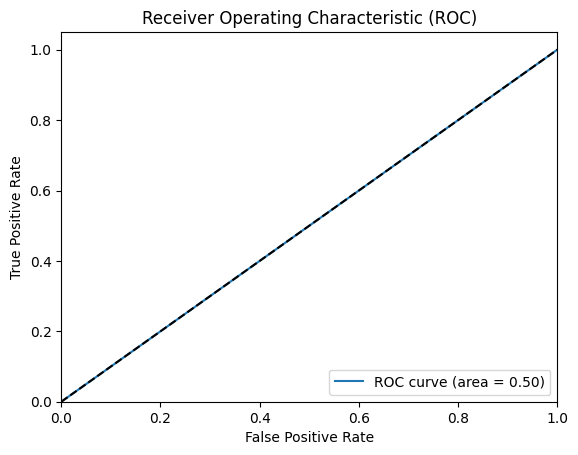

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make predictions on the validation set
val_predictions = model.predict(val_data_gen)

# Get the true labels of the validation set
y_true = val_data_gen.classes

# Calculate the false positive rate and true positive rate for different probability thresholds
fpr, tpr, thresholds = roc_curve(y_true, val_predictions[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model('/content/drive/MyDrive/model.h5')

# Load the image
img_path = '/content/drive/MyDrive/1nop.png'
img = load_img(img_path, target_size=(256, 256))  # Resize the image to the same size you used for training
x = img_to_array(img)  # Convert the image to a numpy array
x = np.expand_dims(x, axis=0)  # Add an extra dimension to represent the batch

# Make a prediction
# Make a prediction
pred = model.predict(x, batch_size=0)
if pred.any()>=0.5:
    print('Breast cancer is not detected.')
else:
    print('Breast cancer is  detected.')




1/1 [==============================] - 0s 254ms/step
Breast cancer is not detected.
